<font size="6">**How does the level of education in different parts of London affect house prices?**</font>

<font size="4">**Student ID number:201707588**</font>

<font size="5">**Hypothesis**</font>

**The higher the house price, the higher the level of education of the population living in the area.**

In [1]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

<font size="4">**1. Loading data**</font>

**First, two CSV files are loaded from the specified path, containing data on the highest level of education and median house price data for 2014-2015.The median house price data for each MSOA area in London is data I obtained from the CDRC website at the following link (see: https://data.cdrc.ac.uk/dataset/cdrc-median-house-prices-geodata-pack-1995-2015-city-of- london-e09000001). Then the level of educational attainment of the population in each MSOA borough in London I got from the 2011 UK Census.**


In [2]:
# Loading data
education_data = pd.read_csv('D:/5990/Highest_level.csv')
house_price_data = pd.read_csv('D:/5990/Median_House_Price_201415.csv')

<font size="4">**2. Merging data sets**</font>

**The education attainment data and house price data were first merged together via the London MSOA codes.The merged dataset contains information on educational attainment and median house prices for each MSOA in London, which facilitates further analysis and visualisation.**


In [3]:
# Merging data sets
merged_data = pd.merge(education_data, house_price_data, on="MSOA")

<font size="4">**3. Calculation of the percentage of the population with a high level of education and with a low level of education**</font>

**Calculation of the proportion of the population with high and low levels of qualifications in each MSOA in London. Higher education levels include Highest_level_of_qualification_Level_3_qualifications_and_Highest_level_of_qualification_Level_4_qualifications_and_above, low education levels include Highest_level_of_qualification_Level_1_Level_2_or_Apprenticeship.**


In [4]:
# Calculation of the percentage of people with high and low education
merged_data['High_Education'] = (merged_data['Highest_level_of_qualification_Level_3_qualifications'] + 
                                 merged_data['Highest_level_of_qualification_Level_4_qualifications_and_above'])
merged_data['Low_Education'] = merged_data['Highest_level_of_qualification_Level_1_Level_2_or_Apprenticeship']
merged_data['High_Education_Percentage'] = (merged_data['High_Education'] / 
                                            (merged_data['High_Education'] + merged_data['Low_Education'])) * 100

<font size="4">**4. Data standardisation**</font>

**StandardScaler is the standardisation of data. StandardScaler allows K-mean clustering to be performed in such a way that differences in the proportions of different features do not affect the clustering results.**


In [5]:
# Standardised data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(merged_data[['Median_House_Price_201415', 'High_Education_Percentage']])

<font size="4">**5. K-means clustering**</font>

**The data obtained after standardisation was subjected to cluster analysis using K-means. The data was divided into 3 clusters, which were used to show the relationship between high education levels and the distribution of house prices, in preparation for the subsequent scatterplot.The main process of K-means clustering is to classify points and then minimise their distance from their centre of mass.**


In [6]:
#  K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
merged_data['Cluster'] = clusters

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<font size="5">**Non-spatial data visualisation**</font>

<font size="4">**6. Non-spatial data visualisation of the resulting clustering results for high education levels**</font>

**The Seaborn library was borrowed to create a scatterplot to show the relationship between the percentage of highly educated people and the median house price, and then the different clusters were represented in purple, green and yellow respectively. Its main purpose is to better distinguish.**


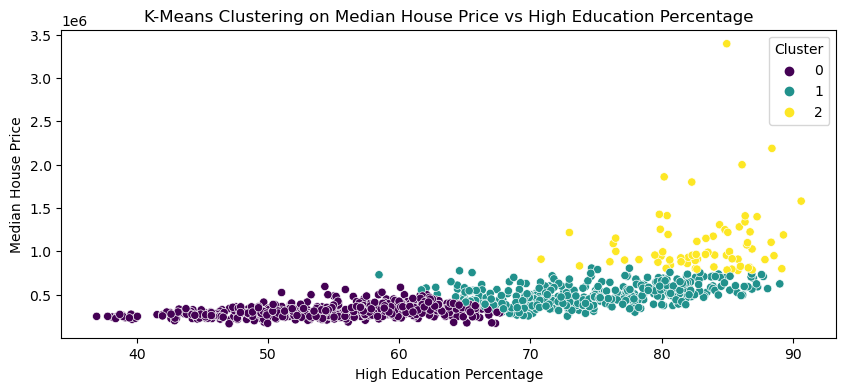

In [7]:
# Perform K-means clustering
plt.figure(figsize=(10, 4))
sns.scatterplot(x='High_Education_Percentage', y='Median_House_Price_201415', hue='Cluster', data=merged_data, palette='viridis')
plt.title('K-Means Clustering on Median House Price vs High Education Percentage')
plt.xlabel('High Education Percentage')
plt.ylabel('Median House Price')
plt.show()

<font size="4">**Conclusions from cluster analyses:**</font>

**(i) The distribution is characterised by three groups:**

Group 0 (purple): This group is concentrated in areas with a low proportion of highly educated people (40 to 60 per cent) and low median house prices.
Areas with low median house prices. These are likely to be areas with relatively few educational resources and relatively low house prices.

Group 1 (green): These are areas with a medium proportion of educational attainment (60-80 per cent) and medium median house prices.
Medium house prices. This may be an up-and-coming residential area or an area with some educational resources and economic level.

Group 2 (Yellow):This group is concentrated in areas with a high percentage of higher education (80-90%) and high median house prices.
These districts are usually economically well-developed, with rich educational resources and higher house prices.

**(ii) The relationship between house prices and the proportion of education:**

As can be seen from the figure, the median house price tends to rise significantly as the proportion of the population with higher education increases. This indicates that there is a positive correlation between house prices and the proportion of highly educated population.

**(iii) Differences in the distribution of regional economic and educational resources:**

From the clustered distribution, there are significant regional differences in house prices and educational resources in London. Region
with high proportions of highly educated people also tend to have higher house prices, while areas with low proportions of highly educated people have relatively lower house prices. This phenomenon reflects the uneven distribution of educational resources and economic levels across regions.


<font size="5">**Spatial data processing and visualisation**</font>

<font size="4">**7. Loading GeoJSON files**</font>
    
**Load a GeoJSON file containing the geographic boundaries of London from the specified path. This file contains geographic boundary information for each MSOA and is used for spatial data visualisation.**


In [8]:
# Loading GeoJSON files
geo_data = gpd.read_file('D:/5990/LondonMSOA2011.geojson')

# Ensure that MSOA codes are in string format in both datasets
geo_data['msoa11cd'] = geo_data['msoa11cd'].astype(str)
merged_data['MSOA'] = merged_data['MSOA'].astype(str)


<font size="4">**8. Merging the GeoDataFrame with the clustering results**</font>

**Merge the geographic boundary data with the clustering results calculated earlier. This allows the clustering results for each MSOA to be displayed on a map for spatial data analysis and visualisation.**


In [9]:
# Merging GeoDataFrame and Clustering Results
geo_merged = geo_data.merge(merged_data, left_on='msoa11cd', right_on='MSOA', how='left')


<font size="4">**9. Spatial data visualisation of the percentage of people with high levels of educational attainment**</font>

**GeoPandas was used to create a map showing the distribution of the percentage of people with high levels of education in each region. Different colours represent different percentages of people with high levels of education, which allows us to visualise the distribution of education levels in each region of London.**


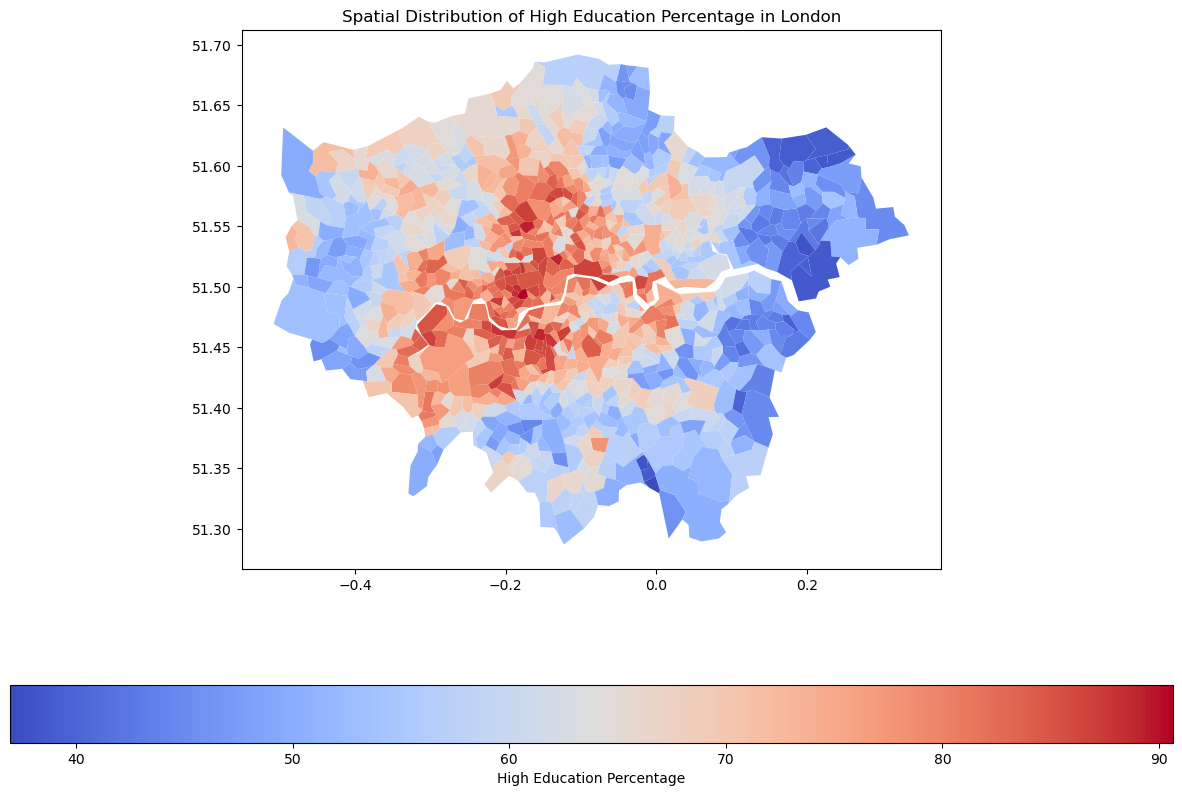

In [10]:
# Spatial data visualisation of the percentage of people with high education levels
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
geo_merged.plot(column='High_Education_Percentage', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "High Education Percentage", 'orientation': "horizontal"})
plt.title('Spatial Distribution of High Education Percentage in London')
plt.show()

<font size="4">**Spatial distribution of median house price grading in London**</font>


**This graph shows the spatial distribution of median house prices in each London borough categorised into five tiers. As you can see from the graph:**

**(i)** High house prices are mainly concentrated in central London and some western areas, where house prices are graded as ‘Above Average’ and ‘High’, coloured in dark red.

**(ii)** Low price areas are mainly located in the outer areas of London, these areas are graded as ‘Low’ and ‘Below Average’, with a light yellow colour.

**(iii)** Uneven distribution of house prices: Overall, house prices in London show a trend of high distribution in the centre and low distribution in the periphery.


<font size="4">**10. Classification and visualisation of median house prices**</font>

**Based on the median house price quartile, house prices are categorised into five classes and maps are created to show the spatial distribution of different house price ranges. This provides a clearer picture of the distribution of house prices by region.**


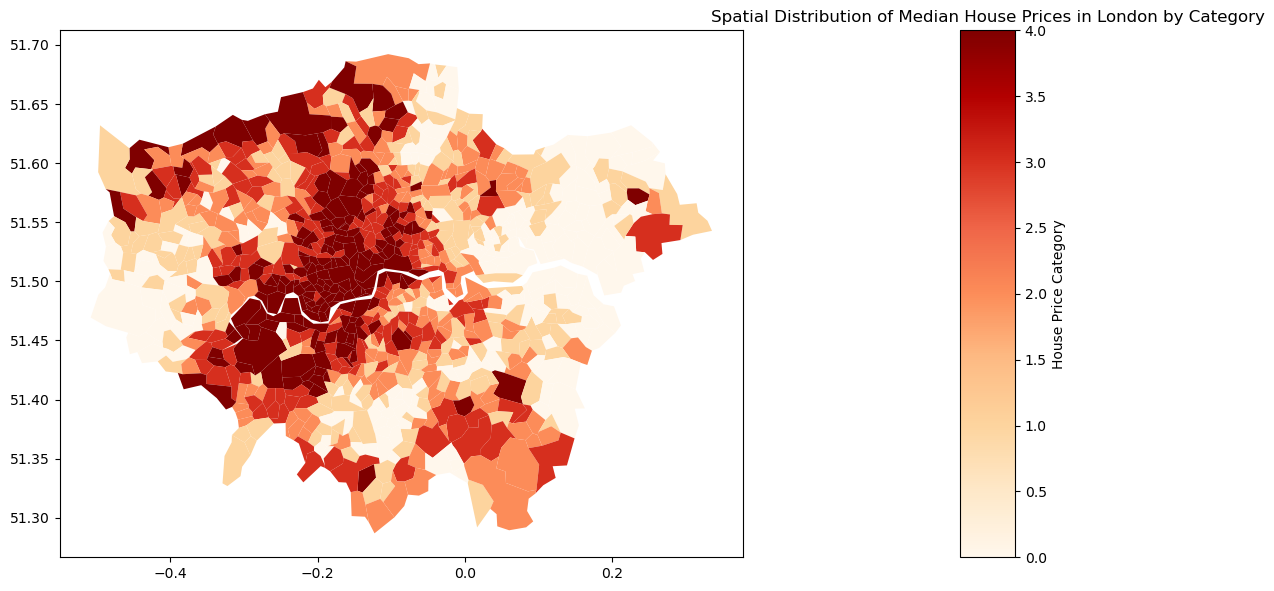

In [11]:
# Graded median house prices and visualisation
quantiles = geo_merged['Median_House_Price_201415'].quantile([0.2, 0.4, 0.6, 0.8]).tolist()
bins = [geo_merged['Median_House_Price_201415'].min()] + quantiles + [geo_merged['Median_House_Price_201415'].max()]
labels = ['Low', 'Below Average', 'Average', 'Above Average', 'High']
geo_merged['Price_Category'] = pd.cut(geo_merged['Median_House_Price_201415'], bins=bins, labels=labels, include_lowest=True)
geo_merged['Price_Category_Numeric'] = geo_merged['Price_Category'].cat.codes  # 将分类转换为数值型以便缩放

# Preparing visualisations with colour bars
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plotting disaggregated data
geo_merged.plot(column='Price_Category_Numeric', ax=ax, cmap='OrRd', legend=True,
                cax=cax, legend_kwds={'label': "House Price Category"})

# Setting up titles and labels
plt.title('Spatial Distribution of Median House Prices in London by Category')
plt.show()

<font size="4">**Spatial distribution of highly educated people**</font>


**This graph shows the distribution of the proportion of people with higher qualifications (i.e. those with higher education levels) in each London borough. As you can see from the graph:**

**(i)** Areas with high proportions of people with higher levels of education are concentrated in central London and some of the west of the city; these areas are coloured red, which means that they have high proportions of people with higher levels of education.

**(ii)** Areas with low proportions of highly educated people are mainly in the outer parts of London, which are coloured blue, indicating a low proportion of highly educated people.

**(iii)** Uneven distribution of highly educated people: Overall, London's highly educated people also tend to be more concentrated in the centre and less concentrated in the periphery.


<font size="4">**Comprehensive analysis**</font>


**There is a positive correlation between the proportion of highly educated people and median house prices: areas with a high proportion of highly educated people tend to have higher house prices and vice versa. That is, Central and West London not only have high house prices, but also high proportions of highly educated people, whereas peripheral areas have lower house prices and relatively low proportions of highly educated people.**


<font size="4">**11. Calculation and visualisation of the correlation index**</font>

**Normalise the percentage of highly educated people and the house price classification and calculate the sum of the two as a correlation index. This correlation index provides a comprehensive view of the spatial distribution of education levels and house prices and displays the distribution on a map.**


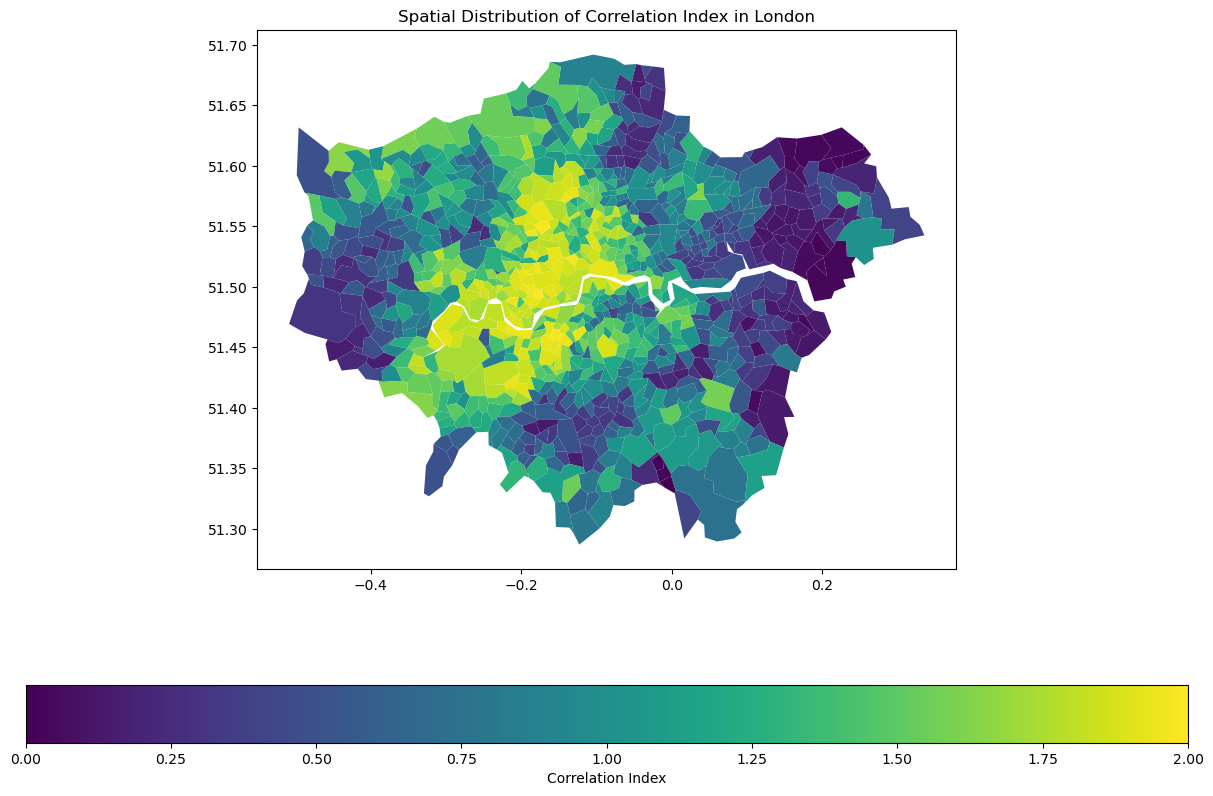

In [12]:
# Calculate and visualise the correlation index
scaler = MinMaxScaler()
geo_merged['Scaled_High_Edu'] = scaler.fit_transform(geo_merged[['High_Education_Percentage']])
geo_merged['Scaled_Price_Category'] = scaler.fit_transform(geo_merged[['Price_Category_Numeric']])
geo_merged['Correlation_Index'] = geo_merged['Scaled_High_Edu'] + geo_merged['Scaled_Price_Category']

# Visualisation-related indices
fig, ax = plt.subplots(1, figsize=(15, 10))
geo_merged.plot(column='Correlation_Index', ax=ax, cmap='viridis', legend=True,
                legend_kwds={'label': "Correlation Index", 'orientation': "horizontal"})
plt.title('Spatial Distribution of Correlation Index in London')
plt.show()

<font size="4">**Synthesis of findings**</font>


**(i) High correlation areas are concentrated in Central and West London:**

As can be seen from the correlation index graphs, the correlation index is higher in Central and West London, with a yellowish-green colour, indicating that there is a stronger positive correlation between the proportion of highly educated people and median house prices in these areas. This means that as the proportion of highly educated people increases in these areas, house prices are correspondingly higher.

**(ii) Weaker correlation in peripheral areas:**

In outer London areas, the correlation index is lower and coloured purple, indicating a weaker correlation between the proportion of the population with higher education and median house prices in these areas.
The correlation between the proportion of the population with higher education and median house prices is weaker in these areas. This reflects that there is no obvious link between house prices and educational attainment in these districts, or that they are more affected by other factors.

**(iii) There is a clear divide between central and outer boroughs:**

Overall, Central and West London not only have higher house prices and a higher proportion of the population with higher education, but also a stronger correlation between the two. The peripheral areas, on the other hand, have lower levels of all three. This centre-periphery divide reflects the uneven distribution of London's economic and educational resources.

**(iv) Policy and urban planning insights:**

This concentration of high correlation areas suggests that policy makers and urban planners need to focus on the advantages of central and west London in terms of house prices and educational resources, and also consider how to upgrade the educational level and economic conditions of peripheral areas to narrow the inter-regional gap. For example, by increasing investment in education and improving infrastructure in peripheral areas, it may be possible to help increase the attractiveness of these areas and boost their house prices and education levels.